## Designing Interfaces with Widgets

In the previous lesson, you created some visualisations and some widgets which could control them, but it didn't look that amazing. The layout of the buttons, widgets, sliders, and other elements your design can affect usability, readability, and the experience of those using the app. Luckily, ipywidgets makes it pretty easy to design layouts. 

In [1]:
#First, we'll load the data and functions from the last notebook. 

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plot_display = widgets.Output()

m_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='M:')

c_slider = widgets.IntSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='C:')


x = np.random.normal(5, 2, 100)
def generate_y(x, m, c):
    return m*x + c

def update_chart(change):
    y = generate_y(x, m_slider.value, c_slider.value)
    plot_display.clear_output(wait=True)
    with plot_display:
        fig, ax = plt.subplots()
        chart = ax.scatter(x, y)
        plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Now, lets draw them all together as we did before: 

Output()

IntSlider(value=2, description='M:', max=10)

IntSlider(value=3, description='C:', max=10)

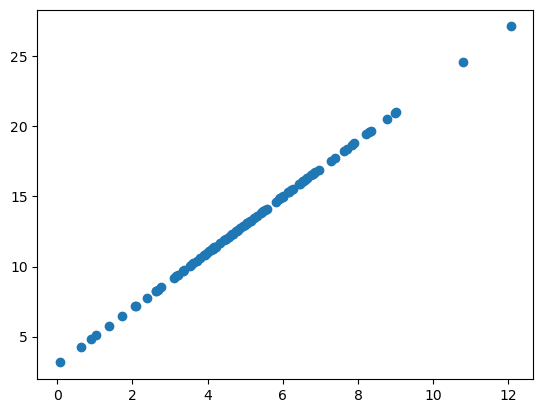

In [2]:
with plot_display:
    y = generate_y(x, 2, 3)
    fig, ax = plt.subplots()
    chart = ax.scatter(x, y)


def update_chart(change):
    y = generate_y(x, m_slider.value, c_slider.value)
    plot_display.clear_output(wait=True)
    with plot_display:
        fig, ax = plt.subplots()
        chart = ax.scatter(x, y)
        plt.show()

display(plot_display)
display(m_slider)
display(c_slider)

m_slider.observe(update_chart, 'value')
c_slider.observe(update_chart, 'value')

### Blocks and Boxes

Using special box widgets, it is possible to put different widgets and displays together in order to create cohesive and pleasing interfaces. Because these are all python objects, you simply have to put them together in lists and structures as per your preference. These boxes are known as containers, and can contain widgets, visualisations, or other containers. Using these containers, it is possible and relatively easy to construct user interfaces based on the relative position of your widgets, containers, and visualisations. 

In [3]:
#We will create a horizontal container to hold the sliders.
widget_container = widgets.HBox([m_slider, c_slider])
display(widget_container)

Notice how putting these widgets in the container doesn't affect their output or relationship to the rest of the widgets and visualisations, they still interact with the charts and callbacks you have defined. 

Using a combination of these different grids, boxes, containers, and charts, it is possible to build quite complex and advanced interfaces, allowing users to select many options and visualisations without becoming overwhelmed by too many choices at once. Now, you will create some layouts of your own.

In [4]:
#Exercise 1: Create a new layout with the sliders on the left and the chart on the right.



In [5]:
#Exercise 2: Create a layout with the chart on top, the sliders below on the left, and the dropdown menu on the right.  


In [6]:
#Exercise 3: Create a layout with two charts, one showing each of the two results from the dropdown menu (e.g. linear and exponential) on top, and
#the sliders below on the left. Do not show the dropdown menu.

In [7]:
#Exercise 1 solution: 
side_by_side_layout = widgets.HBox([widget_container, plot_display])
display(side_by_side_layout)

In [8]:
#Exercise 2 solution:
modal_dropdown = widgets.Dropdown(options=['Linear', 'Exponential'])
widget_container_v = widgets.VBox([m_slider, c_slider])
options_container = widgets.HBox([widget_container_v, modal_dropdown])

ui_container = widgets.VBox([plot_display, options_container])
display(ui_container)


In [9]:
def generate_y(x, m, c):
    return m*x + c


def generate_y_exp(x, m, c):
    return x**m + c


m_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='M:')

c_slider = widgets.IntSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='C:')


exp_plot_display = widgets.Output()
lin_plot_display = widgets.Output()

with exp_plot_display:
    y = generate_y_exp(x, 2, 3)
    e_fig, e_ax = plt.subplots(figsize=(3, 3))
    exp_chart = e_ax.scatter(x, y)
    plt.show()

with lin_plot_display:
    y = generate_y(x, 2, 3)
    l_fig, l_ax = plt.subplots(figsize=(3, 3))
    lin_chart = l_ax.scatter(x, y)
    plt.show()

def update_chart_new(change):
    print(m_slider.value)
    print(c_slider.value)

    exp_plot_display.clear_output(wait=True)

    with exp_plot_display:
        y = generate_y_exp(x, m_slider.value, c_slider.value)
        e_fig, e_ax = plt.subplots(figsize=(3, 3))
        exp_chart = e_ax.scatter(x, y)
        plt.show()

    lin_plot_display.clear_output(wait=True)
    with lin_plot_display:
        y = generate_y(x, m_slider.value, c_slider.value)
        l_fig, l_ax = plt.subplots(figsize=(3, 3))
        lin_chart = l_ax.scatter(x, y)
        plt.show()



c_slider.observe(update_chart_new, 'value') 
m_slider.observe(update_chart_new, 'value')


charts_container = widgets.HBox([exp_plot_display, lin_plot_display])
two_charts_layout = widgets.VBox([charts_container, widget_container])
two_charts_layout.observe(update_chart_new, 'value')
display(two_charts_layout)
